# SSA(Singular Spectrum Analysis) for Time Series Data

### By Ou Deng. 

#### Memo:
* (July 7,2021) Upgrade to deal with NHK COVID-19 CSV. (single series version)
1. df_target = pd.DataFrame(data_all[Prefecture_Dict[str(to_display[0])]] ) 
2. len(ssa.Xs)
* (June 29,2021) Basic functions.

#### How-to:
* Run NHK_covid19_dataset.py at first to get the latest time series dateset which is df_target_x.csv.
* Load the above dataset in the following line3 with prefecture selection.
* The rest are automatically.

#### Ref:
1. SSA code: https://github.com/aj-cloete/pssa
2. SSA understandings: https://scholar.google.it/citations?user=1druVRYAAAAJ&hl=it


In [1]:
from mySSA import mySSA
import pandas as pd
import numpy as np

In [2]:
## Load time sereies. Static file for testing.
### PCR Positive Daily of all Japan. Data source: https://www.mhlw.go.jp/stf/covid-19/open-data.html   
### How-To: Download form above site and save as pcr_positive_daily20210627.csv
'''
load_file = 'pcr_positive_daily20210627.csv'
data_all = pd.read_csv(load_file, parse_dates=True, index_col='Date')
#data_all = pd.read_csv('new_cases_cr2020.csv', parse_dates=True, encoding='shift-jis')
'''

"\nload_file = 'pcr_positive_daily20210627.csv'\ndata_all = pd.read_csv(load_file, parse_dates=True, index_col='Date')\n#data_all = pd.read_csv('new_cases_cr2020.csv', parse_dates=True, encoding='shift-jis')\n"

Instantiate the ssa object with the time series

In [3]:
# Load time series. The output csv file by NHK_covid19_dataset.py

# Load df_target_2.csv  # _2 means a_0 = 2(Confirmed Cases).

load_file = '/Users/oudeng/Dropbox (Deng)/study/COVID-19/Interconnected_NW/Paper1-1/NHK_COVID-19_Dataset/data_target_2.csv'
data_all = pd.read_csv(load_file, parse_dates=True, index_col='Date', encoding='cp932') #  index_col='Date'

# Select data. df_target_2.iloc[0] = 'Date'.
Prefecture_Dict = {'1': 'Hokkaido','2': 'Aomori','3': 'Iwate','4': 'Miyagi','5': 'Akita','6': 'Yamagata','7': 'Fukushima',
                   '8': 'Ibaraki','9': 'Tochigi','10': 'Gunma','11': 'Saitama','12': 'Chiba', '13': 'Tokyo','14': 'Kanagawa',
                   '15': 'Niggata','16': 'Toyama','17': 'Ishikawa','18': 'Fukui','19': 'Yamanashi','20': 'Nagano',
                   '21': 'Gifu','22': 'Shizuoka','23': 'Aichi','24': 'Mie','25': 'Shiga','26': 'Kyoto','27': 'Osaka',
                   '28': 'Hyogo','29': 'Nara','30': 'Wakayama','31': 'Totori','32': 'Shimane','33': 'Okayama','34': 'Hiroshima',
                   '35': 'Yamaguchi','36':'Tokushima','37': 'Kagawa','38': 'Ehime','39': 'Kochi','40': 'Fukuoka',
                   '41': 'Saga','42': 'Nagasaki','43': 'Kumamoto','44': 'Oita','45': 'Miyazaki','46': 'Kagoshima','47': 'Okinawa'}

# Need input here.
to_display = [13]  # Select prefecture

#L1 = df_target.iloc[:,0].tolist()  # Data date.
#L2 = df_target[Prefecture_Dict[str(to_display[0])]].tolist()  # Selected Data.
#L3 = df_target[Prefecture_Dict[str(to_display[2])]].tolist()
#L4 = df_target[Prefecture_Dict[str(to_display[3])]].tolist()
#L5 = df_target[Prefecture_Dict[str(to_display[4])]].tolist()
#L6 = df_target[Prefecture_Dict[str(to_display[5])]].tolist()

df_target = pd.DataFrame(data_all[Prefecture_Dict[str(to_display[0])]] ) # Selected Data.


In [4]:
df_target

,Tokyo
Date,
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
...,...
2021-07-06,593
2021-07-07,920
2021-07-08,896


In [5]:
# Set which target time series to study.

target_data = Prefecture_Dict[str(to_display[0])]
#target_data = 'PCR_Positive_Daily_JP'
#target_data = 'Tokyo'

series=df_target[target_data]
temp = series.values
day_train=len(temp)
lastDay=len(temp)-1

In [6]:
data_SSA = df_target.loc[:,[target_data]]
# df.loc['date_1':'date_2',['A','B']]

In [7]:
data_SSA

,Tokyo
Date,
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
...,...
2021-07-06,593
2021-07-07,920
2021-07-08,896


In [8]:
ssa = mySSA(data_SSA)

The methods and attributes currently associated with the object is listed below:

In [9]:
# vars(ssa) # To survey ssa. 

In [10]:
[x for x in dir(ssa) if '__' not in x and x[0]!='_']

['decompose',
 'diagonal_averaging',
 'embed',
 'forecast_recurrent',
 'freq',
 'get_contributions',
 'ts',
 'ts_N',
 'ts_name',
 'ts_v',
 'view_reconstruction',
 'view_s_contributions',
 'view_time_series']

The general procedure in SSA is as follows:
1. **Embed** the time series by forming a Hankel matrix of lagged window (length K) vectors.
2. **Decompose** the embedded time series via Singular Value Decomposition
3. **Eigentripple Grouping** is the process of identifying eigenvalue-eigenvector pairs as *trend*, *seasonal* and *noise*
4. **Reconstruct** the time series from the eigenvalue-eigenvector pairs identified as *trend* and *seasonal*.  This is done through a process called *diagonal averaging*.

In [11]:
K = int(len(series) / 10 )*10  # Data length as lagged window. Cut last tail to avoid functional error.
# More details, ref https://pubmed.ncbi.nlm.nih.gov/29495415/
suspected_seasonality = 14 # Pre-check by 'Best ARIMA' function. 7 or 14 days.

In [12]:
ssa.embed(embedding_dimension=K, suspected_frequency=suspected_seasonality, verbose=True)
# test: K=[350,400]

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  546
Trajectory dimensions	: (546, 12)
Complete dimension	: (546, 12)
Missing dimension     	: (546, 0)


In [13]:
ssa.decompose(verbose=True)

----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 12
Dimension of projection space	: 12
Characteristic of projection	: 1.0


In [14]:
len(ssa.Xs)

12

We can view the contribution of each of the signals (corresponding to each singular value) as follows:

/Users/oudeng/Dropbox (Deng)/study/Python3/Python_SSA/Ht/mySSA.py:153: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])


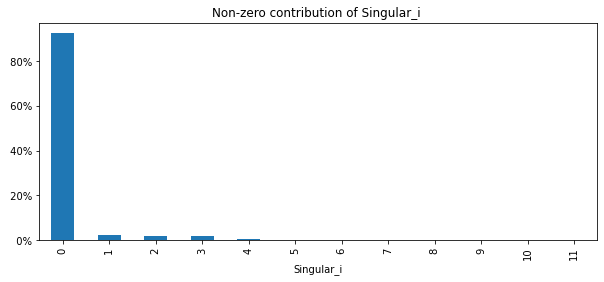

In [15]:
# First enable display of graphs in the notebook
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4

ssa.view_s_contributions()

From the above we can see that most of the variation is contained in the first signal (corresponding to the first singular vector).  The scale in the image above makes it difficult to see what's going on with the remaining singular values.  

Pass the argument  `adjust_scale=True` to see the eigenvalue groupings more clearly.  The scale on the y-axis is meaningless and is removed in this case.

/Users/oudeng/Dropbox (Deng)/study/Python3/Python_SSA/Ht/mySSA.py:153: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])


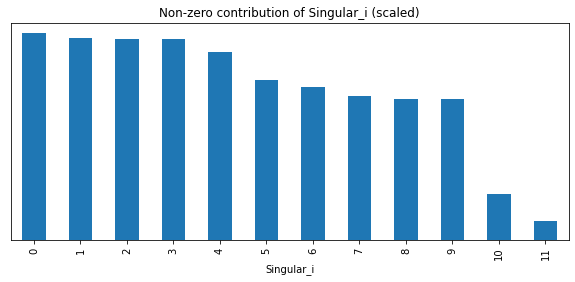

In [16]:
ssa.view_s_contributions(adjust_scale=True)

Now that we have the signal components (there are 15 additive components to the signal) we can loop over that range and look at each one individually.  We only look at the first 5 elements below:

*The additive signal elements are stored in the* `object.Xs` *dictionary.*

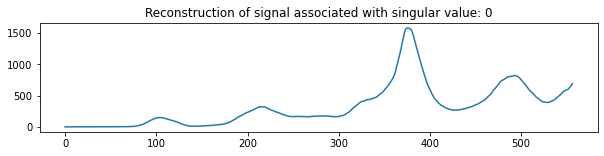

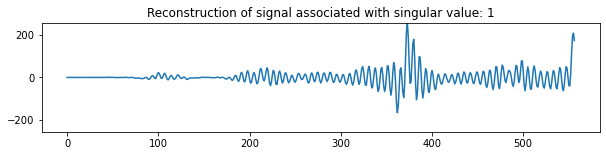

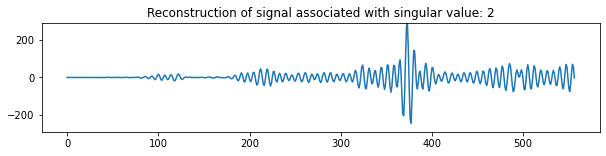

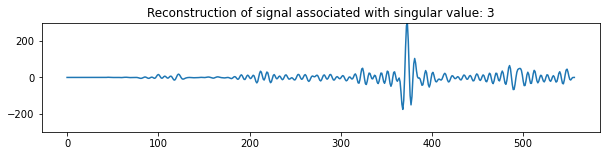

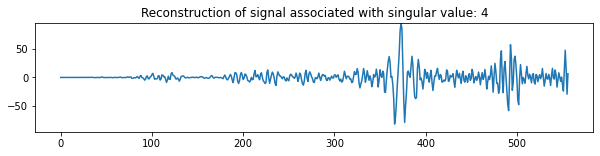

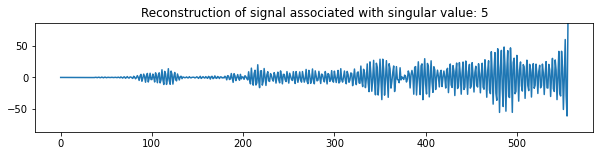

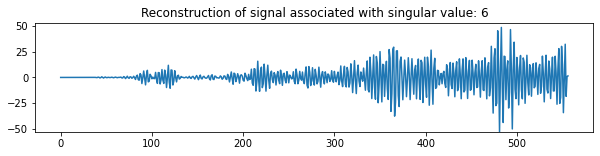

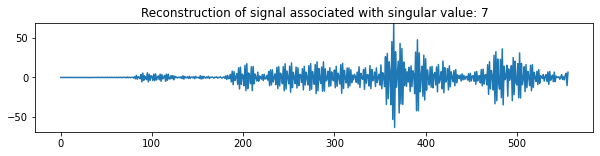

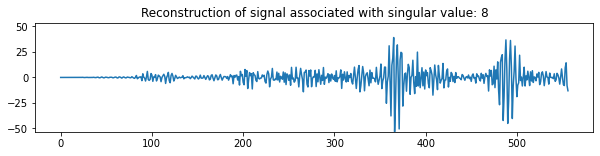

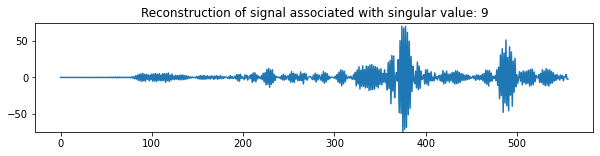

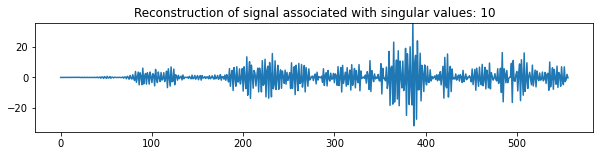

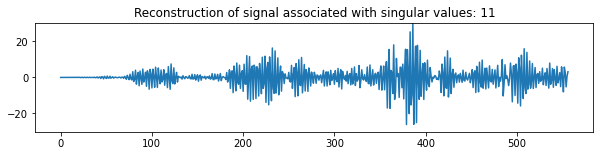

In [17]:
rcParams['figure.figsize'] = 10, 2
for i in range(len(ssa.Xs)):
    ssa.view_reconstruction(ssa.Xs[i], names=i, symmetric_plots=i!=0)
rcParams['figure.figsize'] = 10, 4

Let's see the result if we reconstruct the signal from these streams.  We add the 12 signals and pass the result to `object.view_reconstruction`:

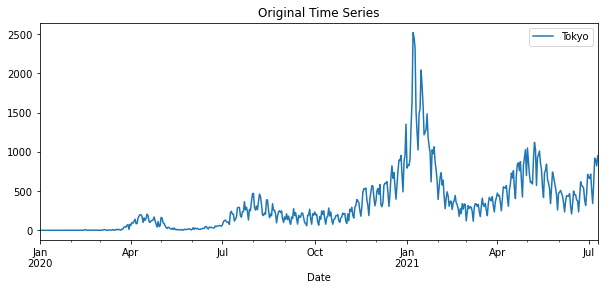

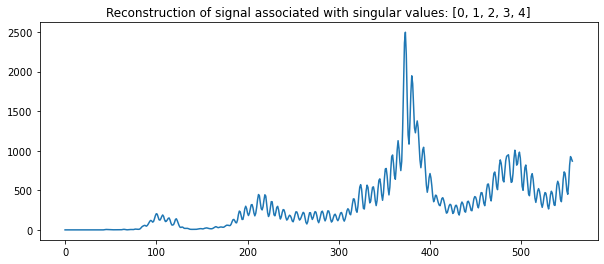

In [18]:
ssa.ts.plot(title='Original Time Series'); # This is the original series for comparison
streams5 = [i for i in range(5)]
reconstructed5 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams5], names=streams5, return_df=True)

We see that the reconstruction looks pretty good already! Let's plot it on the same graph:

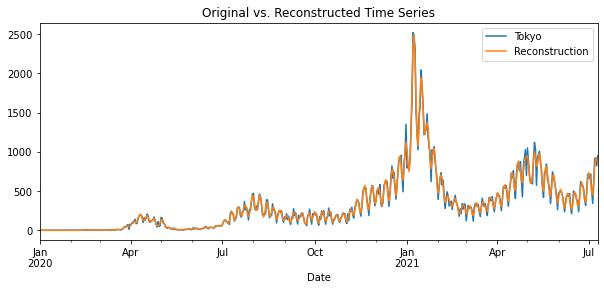

In [19]:
ts_copy5 = ssa.ts.copy()
ts_copy5['Reconstruction'] = reconstructed5.Reconstruction.values
ts_copy5.plot(title='Original vs. Reconstructed Time Series');

That looks very reasonable! We can get closer to the original series by adding additional signals from the remaining singular values.  Let's use the first 5 singular values:

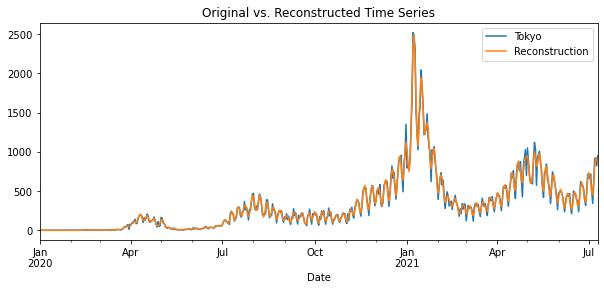

In [20]:
streams5 = [i for i in range(5)]
reconstructed5 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams5], 
                                          names=streams5, return_df=True, plot=False)
ts_copy5 = ssa.ts.copy()
ts_copy5['Reconstruction'] = reconstructed5.Reconstruction.values
ts_copy5.plot(title='Original vs. Reconstructed Time Series');

To forecast using only some of the singular values, pass the list of singular value indices to be used to the `forecast_recurrent` method:

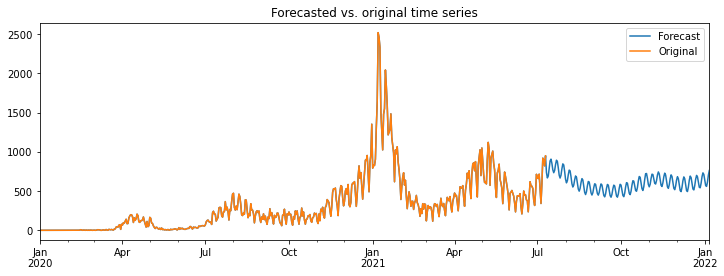

In [21]:
rcParams['figure.figsize'] = 12,4
ssa.forecast_recurrent(steps_ahead=180, singular_values=streams5, plot=True)

That concludes our example.  As a demonstration of how powerful this technique is, let's forecast this series 1x the length of the original time series:

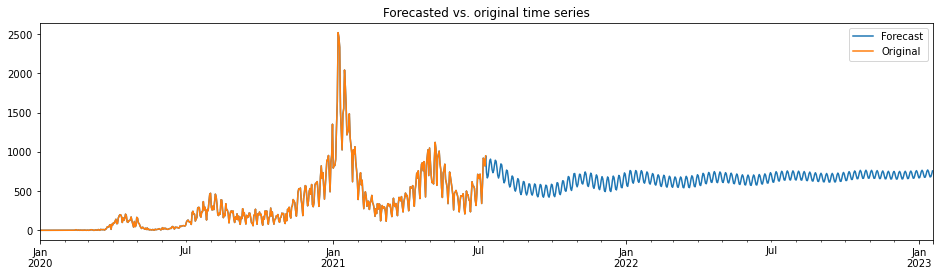

In [22]:
rcParams['figure.figsize'] = 16,4
ssa.forecast_recurrent(steps_ahead=ssa.ts.shape[0], singular_values=streams5, plot=True)